In [5]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
env = gym.make('BipedalWalker-v3')
env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)

Episode 100	Average Score: -98.73.73 	 Score: -100.70
Episode 200	Average Score: -114.72.72 	 Score: -112.85
Episode 300	Average Score: -80.35.35 	 Score: -41.4401
Episode 400	Average Score: -63.88.88 	 Score: -96.852
Episode 500	Average Score: -70.63.63 	 Score: -53.991
Episode 600	Average Score: -59.01.01 	 Score: -99.907
Episode 700	Average Score: -70.66.66 	 Score: -47.077
Episode 800	Average Score: -44.08.08 	 Score: -50.760
Episode 900	Average Score: -69.06.06 	 Score: -55.118
Episode 1000	Average Score: -100.89.89 	 Score: -119.84
Episode 1100	Average Score: -109.90.90 	 Score: -42.130
Episode 1200	Average Score: -47.10.10 	 Score: -32.7260
Episode 1300	Average Score: -111.18.18 	 Score: -113.93
Episode 1400	Average Score: -97.02.02 	 Score: -104.020
Episode 1500	Average Score: -101.06.06 	 Score: -40.509
Episode 1600	Average Score: -74.74.74 	 Score: -113.342
Episode 1700	Average Score: -108.48.48 	 Score: -122.90
Episode 1800	Average Score: -95.58.58 	 Score: -107.317
Episode 

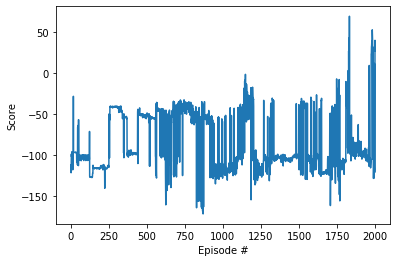

In [7]:
def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\r Episode {} \t Average Score: {:.2f} \t Score: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [25]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
agent.reset()   
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()